In [49]:
from urllib.request import urlopen
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import FreqDist 
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
target_url0 = 'http://www.gutenberg.org/files/135/135-0.txt'
book_raw = urlopen(target_url0).read().decode('utf-8')

In [3]:
type(book_raw)

str

In [4]:
len(book_raw)

3324222

In [5]:
book_raw = re.sub(r'[^\w\s]','',book_raw)

In [6]:
book_raw[1:250]

'he Project Gutenberg eBook of Les Misérables by Victor Hugo\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever You may copy it give it away o'

In [7]:
word_tokens  = word_tokenize(book_raw)

In [8]:
len(word_tokens)

568151

In [9]:
stop_words   = (stopwords.words('english'))

In [10]:
len(stop_words)
stop_words[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

# DIY Exercises - 1 : Lengthy books

In [11]:
url1='https://www.gutenberg.org/files/1184/1184-0.txt'
url2='https://www.gutenberg.org/files/2600/2600-0.txt'
url3='https://www.gutenberg.org/cache/epub/996/pg996.txt'
book1 = urlopen(url1).read().decode('utf-8')
book2 = urlopen(url2).read().decode('utf-8')
book3 = urlopen(url3).read().decode('utf-8')

In [12]:
book_raw[1:250]

'he Project Gutenberg eBook of Les Misérables by Victor Hugo\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever You may copy it give it away o'

# Count how many sentences each book has.

In [13]:
Miserables_sentences1 = sent_tokenize(book1)
Miserables_sentences2 = sent_tokenize(book2)
Miserables_sentences3 = sent_tokenize(book3)

In [14]:
print('sentences book1 :',len(Miserables_sentences1))
print('sentences book2:',len(Miserables_sentences2))
print('sentences book3:',len(Miserables_sentences3))

sentences book1 : 15386
sentences book2: 26548
sentences book3: 6432


In [15]:
#average length of a sentence

lenBook1=[]
lenBook2=[]
lenBook3=[]

for sent in Miserables_sentences1:
    lenBook1.append(len(sent))
for sent in Miserables_sentences2:
    lenBook2.append(len(sent))
for sent in Miserables_sentences3:
    lenBook3.append(len(sent))
N_lenBook1=np.array(lenBook1)
N_lenBook2=np.array(lenBook2)
N_lenBook3=np.array(lenBook3)

In [16]:
print("average length of a sentence of book1: ",N_lenBook1.mean())
print("average length of a sentence of book2: ",N_lenBook2.mean())
print("average length of a sentence of book3: ",N_lenBook3.mean())

average length of a sentence of book1:  173.99421552060315
average length of a sentence of book2:  121.96459243634172
average length of a sentence of book3:  365.3838619402985


# DIY Exercises - 2 : Word Clouds and frequency counts

In [17]:
fdist_example = FreqDist(word_tokens)

In [18]:
fdist_example

FreqDist({'the': 36544, 'of': 19596, 'and': 14027, 'a': 13409, 'to': 13327, 'in': 10246, 'was': 8536, 'that': 7229, 'he': 6778, 'had': 6130, ...})

In [19]:
Miserables_words1 = word_tokenize(book1)
Miserables_words2 = word_tokenize(book2)
Miserables_words3 = word_tokenize(book3)

In [20]:
fdist_book1 = FreqDist(Miserables_words1)
fdist_book2 = FreqDist(Miserables_words2)
fdist_book3 = FreqDist(Miserables_words3)



unique words frequency book1: <FreqDist with 22656 samples and 574966 outcomes>
unique words frequency book2: <FreqDist with 22644 samples and 674191 outcomes>
unique words frequency book3: <FreqDist with 20284 samples and 498734 outcomes>


In [23]:
filtered_word_freq_book1=dict((example,freq) for example, freq in fdist_book1.items())
filtered_word_freq_book2=dict((example,freq) for example, freq in fdist_book2.items())
filtered_word_freq_book3=dict((example,freq) for example, freq in fdist_book3.items())
print("unique words frequency book1:",filtered_word_freq_book1)
print("unique words frequency book2:",filtered_word_freq_book2)
print("unique words frequency book3:",filtered_word_freq_book3)

unique words frequency book1: {'\ufeffThe': 1, 'Project': 85, 'Gutenberg': 29, 'eBook': 11, 'of': 12816, 'The': 2112, 'Count': 267, 'Monte': 1134, 'Cristo': 1105, ',': 44973, 'by': 2068, 'Alexandre': 3, 'Dumas': 3, 'père': 3, 'This': 319, 'is': 3982, 'for': 3236, 'the': 26402, 'use': 96, 'anyone': 110, 'anywhere': 10, 'in': 6251, 'United': 16, 'States': 18, 'and': 11620, 'most': 415, 'other': 499, 'parts': 21, 'world': 200, 'at': 2867, 'no': 1082, 'cost': 29, 'with': 3894, 'almost': 238, 'restrictions': 2, 'whatsoever': 3, '.': 14094, 'You': 828, 'may': 497, 'copy': 14, 'it': 3737, 'give': 303, 'away': 215, 'or': 1376, 're-use': 2, 'under': 208, 'terms': 45, 'License': 10, 'included': 7, 'this': 2116, 'online': 4, 'www.gutenberg.org': 5, 'If': 246, 'you': 7112, 'are': 1666, 'not': 3944, 'located': 7, 'will': 1933, 'have': 3174, 'to': 12707, 'check': 12, 'laws': 21, 'country': 74, 'where': 368, 'before': 511, 'using': 13, 'Title': 1, ':': 316, 'Author': 1, 'Release': 1, 'Date': 1, 'Janu

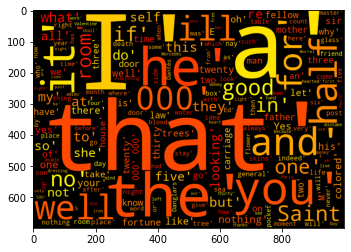

In [28]:
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='black', colormap=matplotlib.cm.autumn,
                min_font_size = 10).generate(str(filtered_word_freq_book1))
plt.imshow(wordcloud)